In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d, median_filter, gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import os
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'stix'
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.patheffects as pe

In [2]:
from matplotlib.colors import LinearSegmentedColormap

def create_uniform_colormap(rgb_list, name='custom_colormap'):
    """
    Create a uniform colormap from a list of RGB colors.

    Parameters:
    rgb_list (list of tuples): List of RGB colors.
    name (str): Name of the colormap.

    Returns:
    LinearSegmentedColormap: The created colormap.
    """
    return LinearSegmentedColormap.from_list(name, rgb_list)

# Example usage:
rgb_kbcw = [(0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1)]
custom_cmap = create_uniform_colormap(rgb_kbcw)

In [3]:
filename = f'f127.dat'
data = np.loadtxt('../data/'+filename, skiprows=4)

[None]

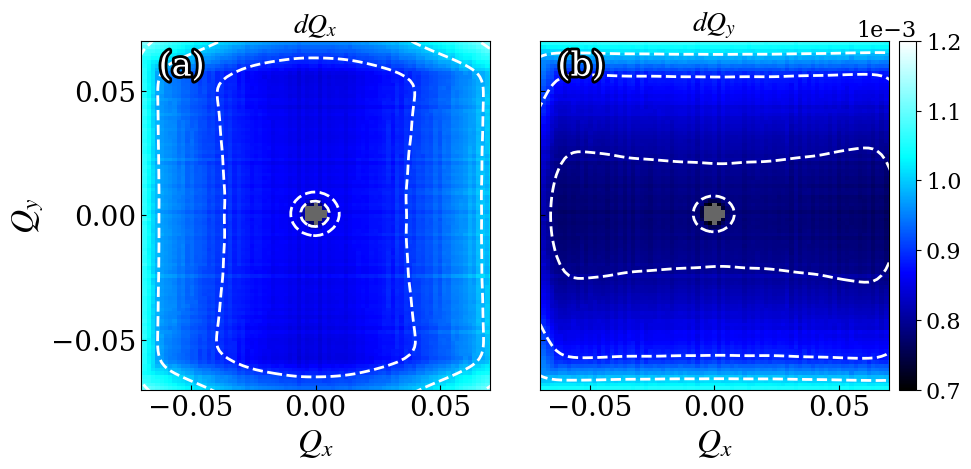

In [4]:
def fmt(x):
    a = np.floor(np.log10(x))
    b = x/10**a
    return r'${b:.1f}\times10^{{{a:d}}}$'.format(b=b,a=a.astype(int))

fig = plt.figure(figsize=(10, 5))
grid = AxesGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.5, cbar_mode='single', cbar_location='right', cbar_pad=0.1)

levels = [0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012]
panel_texts = ['(a)', '(b)']

titles = [r'$dQ_{x}$', r'$dQ_{y}$']

for i, ax in enumerate(grid):
    qx = data[:, 0]
    qy = data[:, 1]
    I = data[:, 4 + i]
    N_sum = np.sum(I[np.isfinite(I)])

    # Create a grid of q values
    qx_unique = np.unique(qx)
    qy_unique = np.unique(qy)
    qx_grid, qy_grid = np.meshgrid(qx_unique, qy_unique)
    N_grids = len(qx_unique) * len(qy_unique)

    # Interpolate the intensity values onto the grid
    I_grid = griddata((qx, qy), I, (qx_grid, qy_grid), method='nearest')
    I_grid_sm = gaussian_filter(np.nan_to_num(I_grid), sigma=3)

    im = ax.pcolormesh(qx_grid, qy_grid, I_grid, cmap=custom_cmap, vmax=0.0012, vmin=0.0007)
    Cs = ax.contour(qx_grid, qy_grid, I_grid_sm, levels=levels, colors='w', linewidths=2, linestyles='--')
    ax.set_xlabel(r'$Q_x$', fontsize=24)
    ax.set_ylabel(r'$Q_y$', fontsize=24)
    ax.set_xlim([-0.07, 0.07])
    ax.set_ylim([-0.07, 0.07])
    ax.set_facecolor('#666666')
    ax.set_xticks([-0.05, 0, 0.05])
    ax.set_yticks([-0.05, 0, 0.05])
    ax.tick_params(direction='in', labelsize=20)
    ax.set_aspect('equal')
    ax.set_title(titles[i], fontsize=20)
    ax.text(0.05, 0.9, panel_texts[i], transform=ax.transAxes, fontsize=24, color='w', path_effects=[pe.withStroke(linewidth=4, foreground="k")])

cbar = grid.cbar_axes[0].colorbar(im)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks(levels)
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.offsetText.set(size=16)

# plt.tight_layout()
